In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random as rand

1. An Exploration of Newton's Method

In the following cell, Netwon's Method for finding roots is implemented for an arbitrary function $f$. It is ensured that $f'(x) \neq 0$.

In [4]:
def NewtonianMethodology(x,f,fPrime):
    if(fPrime(x)==0):
        print("You really shouldn't be using this function here")
    else:
        xNew = x - (f(x)/fPrime(x))
        return xNew

Now for the first function to be considered: $$f(x)=x^3 - 1$$

In [26]:
f = lambda x:x**3 - 1
fPrime = lambda x:3*(x**2)

iterations = np.arange(999)+1

x_n = np.zeros(iterations.size)
x_0 = 5*(np.random.random_sample(1))
x_n[0]=x_0
print("Initial Value: {}".format(x_0))
convergentTimeStep = 0

for i in iterations:
    x_n[i] = NewtonianMethodology(x_n[i-1],f,fPrime)
    if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
        print("x_n converged to {} after {} iterations".format(x_n[i],i))
        convergentTimeStep = i
        break
    else:
        continue

Initial Value: [3.06956704]
x_n converged to 1.0 after 8 iterations


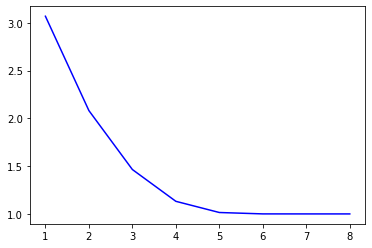

In [27]:
plt.plot(iterations[0:(convergentTimeStep)],x_n[0:(convergentTimeStep)],color = 'blue')
plt.show()

So, taking initial values within the bounds of the interval $(0,5)$, Newton's Method seems to converge to a root, $x = 1$, quite quickly. Running the above code over a wider range of initial conditions should reveal how the magnitude of the initial value is related to the number of steps it takes to converge on a root.

In [32]:
f = lambda x:x**3 - 1
fPrime = lambda x:3*(x**2)

convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    
    iterations = np.arange(999)+1

    x_n = np.zeros(iterations.size)
    x_0 = 0.01*(k+1)
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = NewtonianMethodology(x_n[i-1],f,fPrime)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            break
        else:
            continue
convergenceData = {"x**3 - 1":convergenceTimeSteps}

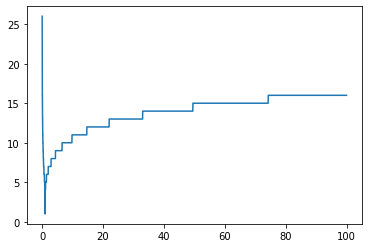

In [7]:
plt.plot(0.01*(np.arange(10000)+1),convergenceTimeSteps)
plt.show()

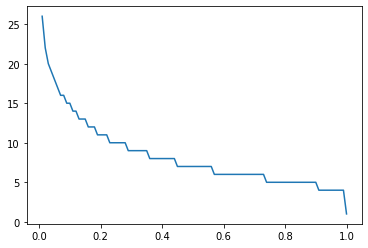

In [10]:
plt.plot(0.01*(np.arange(100)+1),convergenceTimeSteps[0:100])
plt.show()

The above graph of the number of steps required for convergence versus the initial value is really interesting to study: there are a couple features worth discussing. First -- the spike around zero. I can't be sure of why this occurs, but I think that it could be due to the value of the derivative near zero.

As $x \xrightarrow[]{} 0^+$, $f'(x) = 3x^2 \xrightarrow[]{} 0^+$. Therefore, $\frac{1}{f'(x)} \xrightarrow[]{} \infty$.

Because $x^3$ approaches 0, $f(x) = x^3 - 1$ approaches $-1$, so $\frac{f(x)}{f'(x)} \xrightarrow[]{} -\infty$. Thus, our initial value, after its first step, is mapped to a very large value, and the smaller the initial value is, the larger the value it is mapped to: this explains the negative curvature of the graph within the interval $(0,1)$. Thus, for any small initial value in $(0,1)$, it takes it many steps of Newton's Method to get back to $x=1$.

Second -- the first graph seems to imply that the number of steps required to converge on the single root of the function, $x=1$, grows with the square root of the distance of the initial value from $x=1$. One can see that it's not a smooth curve due to the discrete nature of the number of iterations the algorithm requires to converge, but it still retains its appearance.

Let's see what kind of relationships between initial value and iterations needed to converge (henceforth known as the convergence rate) the other functions have.

In [16]:
f = lambda x:x**2
fPrime = lambda x:2*x

convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    
    iterations = np.arange(999)+1

    x_n = np.zeros(iterations.size)
    x_0 = 0.01*(k+1)
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = NewtonianMethodology(x_n[i-1],f,fPrime)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            break
        else:
            continue

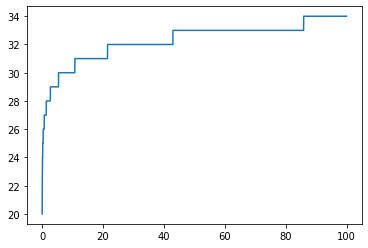

In [17]:
plt.plot(0.01*(np.arange(10000)+1),convergenceTimeSteps)
plt.show()

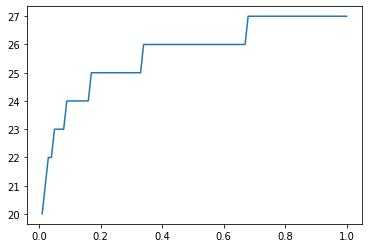

In [18]:
plt.plot(0.01*(np.arange(100)+1),convergenceTimeSteps[0:100])
plt.show()

There are a couple interesting differences between this graph of convergence rate versus initial value and the graph for $f(x)=x^3 -1$. One is that the anomaly near $0$ has been removed: this is probably because as $x \to 0$, $f(x) \to 0$ and $f'(x) \to 0$, and $f(x)$ approaches 0 more quickly, so $\frac{f(x)}{f'(x)} \to 0$.

Hence, one can actually, without knowing anything about the analytic expression for $f(x)$, know what the roots are of $f(x)$ as long as one can tell where $\frac{f(x)}{f'(x)}$ is getting small: i.e the step size is getting small, so the values outputted are getting closer and closer together.

Another thing that is interesting is that the convergence rate is higher pretty much everywhere than it was on the graph for $x^3 - 1$ and the graph is more steep: yet, it still looks a lot like it varies like the square root of the initial value, just with a different curvature. If the relationship between convergence rate $N_C$ and initial value $x_0$ is something like $N_C = cx_0^{r}$ for some $c,r \in \mathbb{R}$, then a log-log plot should reveal such a power-law as well as the value of the exponent $r$ and the constant $c$.

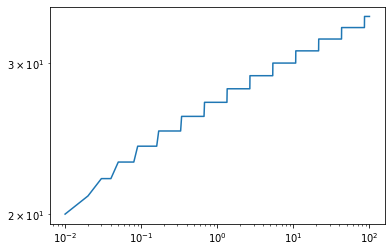

In [19]:
plt.loglog(0.01*(np.arange(10000)+1),convergenceTimeSteps)
plt.show()

Then, when a linear least-squares fit is performed on this data, (this code comes from a consenting friend who knows how to do this better than I do and wrote this for a group project of ours)

In [22]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

popt, pcov = curve_fit(f, np.log(0.01*(np.arange(10000)+1)), np.log(convergenceTimeSteps)) # your data x, y to fit

residuals = np.log(convergenceTimeSteps)- f(np.log(0.01*(np.arange(10000)+1)), *popt)

ss_res = np.sum(residuals**2)

ss_tot = np.sum((np.log(convergenceTimeSteps) - np.mean(np.log(convergenceTimeSteps)))**2)

r_squared = 1 - (ss_res / ss_tot)

print('R^2 value: {}, slope = {}, y-intercept = {}.'.format(r_squared, popt[0], popt[1]))

R^2 value: 0.9591661558920852, slope = 0.04727383593957844, y-intercept = 3.3029568201604844.


So, taking the formula above to indicate $log(N_C) = mlog(x_0) + 3.31$, we get that $N_C = e^{3.31}x_0^m$, so $N_C = e^{3.31}x_0^{0.05}$.

I wasn't fond of this equation at first, but it actually seems like it makes sense: when $x_0 \in (0,1)$, $x_0^{0.05}$ is often close to $1$ so $N_C$ is often close to $e^{3.31}$. Then, because $0.05$ is a really small exponent to have, when $x_0 > 1$, the function wouldn't respond very much to increases in $x_0$, so it would appear very steep within $(0,1)$ and then be slow-growing afterwards, which is what we see.

Out of curiosity, I'll repeat the same analysis for the first equation before moving on to the third equation.

In [28]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

popt, pcov = curve_fit(f, np.log(0.01*(np.arange(10000)+1)), np.log(convergenceData["x**3 - 1"])) # your data x, y to fit

residuals = np.log(convergenceData["x**3 - 1"])- f(np.log(0.01*(np.arange(10000)+1)), *popt)

ss_res = np.sum(residuals**2)

ss_tot = np.sum((np.log(convergenceData["x**3 - 1"]) - np.mean(np.log(convergenceData["x**3 - 1"])))**2)

r_squared = 1 - (ss_res / ss_tot)

print('R^2 value: {}, slope = {}, y-intercept = {}.'.format(r_squared, popt[0], popt[1]))

R^2 value: 0.8404696306929221, slope = 0.18895001511687193, y-intercept = 1.9272859113261527.


Hmm. This doesn't quite yield the fact stated in class that the convergence rate of the first function varied with the square root of the initial condition. It's certainly an imperfect fit, and the discrete nature of the number of iterations required to converge doesn't help matters. Oh well.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


An initial value of 0.01 caused the system to freak out


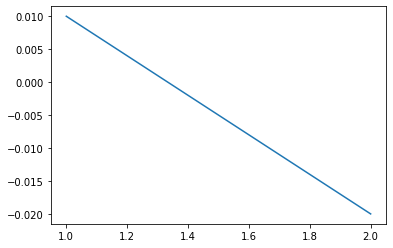

In [36]:
f = lambda x:x**(1/3)
fPrime = lambda x:(1/3)*(x**(1/3))/x


convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.01*(k+1)
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = NewtonianMethodology(x_n[i-1],f,fPrime)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000)+1, x_n)
        plt.show()
        break

Question 2:

Let's perform Newton's Method on $f(x) = x^3 - 2x + 2$. First, to get an idea of how many distinct roots we'd expect to find overall, we can graph this function in the interval $(-4,4)$, where I expect to find the function's roots, or at least where it has values close to $0$.

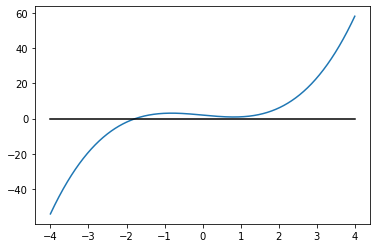

In [43]:
inputs = np.linspace(-4,4,1000)
#nonZeroInputs = inputs[np.where(inputs != 0)]
f = lambda x:x**3 - 2*x + 2
outputs = np.array([f(x) for x in inputs])

plt.plot(inputs,outputs)
plt.plot(inputs,np.zeros(inputs.size),color='black')
plt.show()

It looks as if there could possibly be a root of multiplicity 2 at around 1, so let's zoom in to get a closer look.

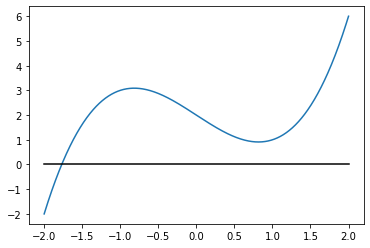

In [44]:
inputs = np.linspace(-2,2,1000)
#nonZeroInputs = inputs[np.where(inputs != 0)]
f = lambda x:x**3 - 2*x + 2
outputs = np.array([f(x) for x in inputs])

plt.plot(inputs,outputs)
plt.plot(inputs,np.zeros(inputs.size),color='black')
plt.show()

Now that we can zoom in further, we see that there is only one place that $f(x)$ crosses the x-axis on the interval $(-2,2)$, and from the plot of the function on the interval $(-4,4)$ above, it seems that the function monotonically increases for inputs greater than $2$ and monotonically decreases for inputs less than $2$. Therefore, this is the only root we're likely to get.

We can also consider the derivative of this function, a quadratic equation, and know that, by the Fundamental Theorem of Algebra, the derivative should have at most two roots, so there should be at most two maxima or minima. We can see that there is a local maximum and a local minimum present on $(-2,2)$, so the function can not start decreasing again after the minimum: therefore, there must only be one root. Let's find it with Newton's Method.

In [6]:
f = lambda x:x**3 - 2*x + 2
fPrime = lambda x:3*(x**2) - 2


convergenceTimeSteps = np.zeros(np.arange(1000).size)
for k in range(0,1000):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.01*k - 5
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = NewtonianMethodology(x_n[i-1],f,fPrime)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

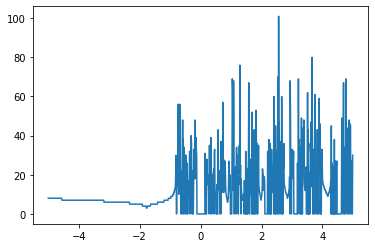

In [8]:
plt.plot(0.01*np.arange(1000) - 5,convergenceTimeSteps)
plt.show()

Question 4:

Investigate the dynamical system given by $x_{n+1} = 2x_n - ax_n^2$. How many fixed points does it have and what are their stability?

I think a prudent step might be to look at the equation and see what kind of fixed points we might expect to see would be. If $\sigma$ is a fixed point of the system, then $\sigma = 2\sigma - a\sigma^2$. Thus, if we solve this equation for $\sigma$, then we should know what the possible fixed points should be.\\

Thus, we have that

$$ 0 = \sigma - a\sigma^2 = \sigma(1 - a\sigma)$$

Thus, two values that satisfy this equation are $\sigma = 0$ and $\sigma = \displaystyle \frac{1}{a}$; we expect these to be our fixed points in the simulation.

If we start out with investigating with $a = 2$, I would expect the fixed points of the system to be $\sigma = 0$ and $\sigma = \displaystyle \frac{1}{2}$.

In [19]:
f = lambda x,a:2*x - a*(x**2)
a = 2

convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.001*k - 5 
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


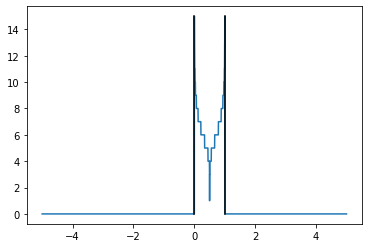

In [21]:
plt.plot(0.001*np.arange(10000) - 5,convergenceTimeSteps)
plt.plot(np.zeros(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.plot(np.ones(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.show()

By looking at this plot, given that initial values that do not give trajectories that converge are given convergence times of $0$, we can tell that, on the interval $(-5,5)$, initial values outside of $[0,1]$ yield trajectories that do not converge. However, it does appear that initial values inside of $[0,1]$ do converge to something, though as of yet we don't quite know. Let's plot what they're converging to.

In [23]:
f = lambda x,a:2*x - a*(x**2)
a = 2

convergentValues = np.zeros(np.arange(1001).size)
for k in range(0,1001):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.001*k
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergentValues[k] = x_n[i]
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

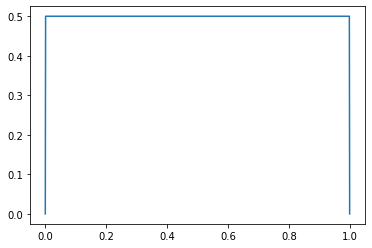

In [25]:
plt.plot(0.001*(np.arange(1001)),convergentValues)
plt.show()

So, it would appear that, for all $x \in [0,1]$ where $x \neq 0,1$, the system converges to $\frac{1}{2}$ when it starts at $x$. Therefore, it would appear that $\frac{1}{2}$ is a stable fixed point and $0$ is an unstable fixed point, as every initial value less than it produces divergent trajectories and every initial value above it produces trajectories heading away from $0$.

$1$ provides an interesting case study though: it is not a fixed point of the system, as it maps away from itself under $f$, but it plays an interesting role. For one, it maps directly to a fixed point in a finite number of iterations, which is an uncommon trait for an initial value, and it also separates a set of convergent initial values from a set of divergent initial values, just like a fixed point would.

$-1$ acts a lot like this under the dynamical system $f(x) = x^2$ because it maps directly to $1$, which is a fixed point of that system. It's like $1$ is a conjugate of $0$ under the mapping above and together with $0$ provides a boundary separating $(0,1)$ from the rest of the real number line which behaves differently under the action of $f$. Just an interesting thing.

In any case, we can see that if an initial value $x_0$ starts out less than $0$, then both $2x$ and $-2x^2$ will be negative, so $f(x_0)$ will be even more negative and, under repeated iteration, $f^n(x_0)$ will trend toward $-\infty$. If $x_0$ starts out greater than $1$, $2x^2 > 2x$, so $f(x) = 2x - 2x^2$ will be a negative number, and as established in the previous sentence, any negative number will trend toward $-\infty$ under repeated iteration.

Thus, that explains part of why this system behaves like it does.

Let's look at the above graphs for two more values of $a$: $a = 1$ and $a = 3$. My hypothesis is that the interval of convergence for $a=1$ will be $[0,2]$, $[0,\frac{2}{3}]$ for $a = 3$, and that the stable fixed point for these will be $\sigma = 1$ and $\sigma = \frac{1}{3}$ respectively.

In [26]:
f = lambda x,a:2*x - a*(x**2)
a = 1

convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.001*k - 5 
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


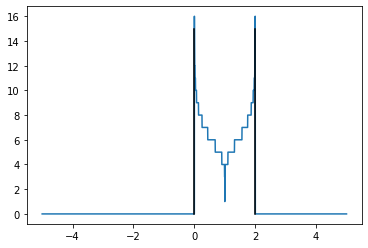

In [30]:
plt.plot(0.001*np.arange(10000) - 5,convergenceTimeSteps)
plt.plot(np.zeros(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.plot(2*np.ones(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.show()

In line with the stated hypothesis, the interval of convergence for this system is $[0,2]$.

In [31]:
f = lambda x,a:2*x - a*(x**2)
a = 1

convergentValues = np.zeros(np.arange(1001).size)
for k in range(0,1001):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.002*k
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergentValues[k] = x_n[i]
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

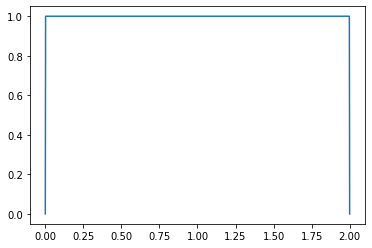

In [32]:
plt.plot(0.002*(np.arange(1001)),convergentValues)
plt.show()

This graph is qualitatively the same as the one before, but everything has been scaled up by two. I'm thinking that the stable fixed point, for a given $a$, will always be $\frac{1}{a}$ and the width of the interval of convergence will be inversely proportional to the value of $a$.

Let's see if this trend continues for $a = 3$; this system should have fixed points of $\sigma = 0$ and $\sigma = \frac{1}{3}$.

In [34]:
f = lambda x,a:2*x - a*(x**2)
a = 3

convergenceTimeSteps = np.zeros(np.arange(10000).size)
for k in range(0,10000):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.001*k - 5 
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergenceTimeSteps[k] = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


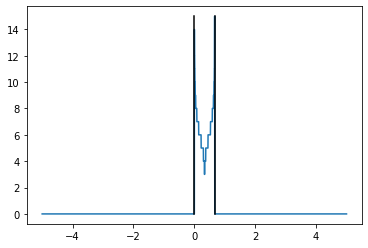

In [37]:
plt.plot(0.001*np.arange(10000) - 5,convergenceTimeSteps)
plt.plot(np.zeros(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.plot((2/3)*np.ones(np.arange(100).size), np.linspace(0,15,100), color = 'black')
plt.show()

So, as posited, the interval of convergence is $[0, \frac{2}{3}]$.

In [45]:
f = lambda x,a:2*x - a*(x**2)
a = 3

convergentValues = np.zeros(np.arange(1001).size)
for k in range(0,1001):
    iterations = np.arange(999)+1
    
    converged = False
    
    x_n = np.zeros(np.arange(1000).size)
    x_0 = 0.00067*k
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],a)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            #print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergentValues[k] = x_n[i]
            converged = True
            break
        else:
            continue
    if(converged==False):
        '''print("An initial value of {} caused the system to freak out".format(x_0))
        plt.plot(np.arange(1000), x_n)
        plt.show()'''
        convergenceTimeSteps[k] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


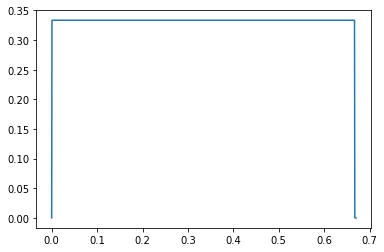

In [46]:
plt.plot(0.00067*(np.arange(1001)),convergentValues)
plt.show()

As anticipated by the previous examples, the fixed point $\sigma = \frac{1}{3}$ seems to attract everything in the interval of convergence except for the fixed point $\sigma = 0$ and its conjugate $\frac{2}{3}$.

So, one might more generally posit, based on what we've been seeing, that the interval of convergence for an arbitrary dynamical system of this form $x_{n+1} = rx_n - ax_n^2$ will be $[0,\frac{r}{a}]$ when $r \geq 0$ and its fixed points will be the solutions of the following series of equations:

$$ \sigma = r\sigma - a\sigma^2 = (r-1)\sigma - a\sigma^2$$

$$ = \sigma((r-1) - a\sigma) $$

which are $\sigma = 0$ and $\sigma = \displaystyle \frac{r-1}{a}$.

Question 4: The Logistic Map

Now, we turn to a famous dynamical system: $$x_{n+1} = rx_n(1-x_n)$$



Our first goal is to understand what we'd expect from the behavior of this system analytically: one approach will be to find the expected fixed points and classify their stability.

The fixed points of the system are $x^* \in \mathbb{R}$ such that $x^* = rx^*(1-x^*)$. Therefore, solving this equation, we obtain the following:

$$ x^* = rx^*(1-x^*) \implies 0 = rx^*(1-x^*) - x^*$$
$$= x^*(r(1-x^*) - 1)$$

$$ \implies x^* = 0 \hspace{1ex} \text{or} \hspace{1ex} r(1-x^*) - 1 = 0 $$

If $r(1-x^*) - 1 = 0$, then the next step that follows is that $r(1-x^*) = 1 \implies 1 - x^* = \frac{1}{r} \implies x^* = 1 - \frac{1}{r} = \frac{r-1}{r}$.

$\therefore$ If $r(1-x^*)-1 = 0$, then $x^* = \frac{r-1}{r}$, so the fixed points of the system are
$$ x^*= 0 \hspace{1ex} \text{and} \hspace{1ex} x^* = \frac{r-1}{r}$$

Let's quickly verify that these are indeed fixed points of the system:
$$ r*0*(1-0) = 0$$

$$ r\frac{r-1}{r}(1 - \frac{r-1}{r}) = (r-1)(\frac{r}{r} - \frac{(r-1)}{r}) = (r-1)(\frac{r - (r-1)}{r}) = (r-1)(\frac{1}{r}) = \frac{r-1}{r} $$

Therefore, since the output of putting the candidate fixed points into the system are the points, these are indeed fixed points. Furthermore, since the equation we used to solve for them was quadratic, we know that there should be no other fixed points since a quadratic polynomial has at most two distinct roots, and we have found two distinct fixed points.

It's worth noting that the fixed point at $\frac{r-1}{r}$ only exists when $r \neq 0$. When $r = 0$, $f(x) = 0$, so $0$ is the only fixed point of the system, and since all points map to $0$ under $f(x)$, $0$ is stable.


Now, the question of stability of these fixed points for $r \neq 0$ comes up. Perturbation analysis should probably yield a good idea of what happens in a small interval around each fixed point.

Let $x^*$ be one of our fixed points above. If we let $f(x) = rx(1-x)$, then, by definition, $f(x^*) = x^*$.

We know that the stability of a fixed point for a discrete-time dynamical system is determined by the magnitude of its derivative at the fixed point: let's calculate those for the fixed points we have in this system.

Since $f(x) = rx(1-x) \implies f(x) = rx - rx^2$, then $f'(x) = r - 2rx$. Thus, we have that

$$ |f'(0)| = |r| $$
$$ |f'(\frac{r-1}{r})| = |r - 2r\frac{r-1}{r}| = |r - 2(r-1)| = |2 - r| $$.

Therefore, when $|r| < 1$, $0$ should be a stable fixed point of the system. This makes sense as $|r| < 1$ implies that $|rx| < |x|$. It is unclear what the exact interval of convergence for $0$ is, except that it should contain $(0,1)$, as any point in that interval will have $|rx(1-x)| < |x|$ as $|rx| < |x|$ and $|1-x| < 1$ in that case.

Then, when $|2-r| < 1 \implies r \in (1,3)$, $\frac{r-1}{r}$ is a stable fixed point. It is again a little unclear what the exact interval of convergence for $\frac{r-1}{r}$ will be.

So, when $r \in (-1,3)$, there is guaranteed to be a stable fixed point of the system, except when $r = 1$: nothing  definitive can be said about that system except that all points in $(0,1)$ will converge to $0$.

Let's now simulate the logistic map and see if any of the above holds.

x_n converged to 0.16666670644620532 after 65 iterations
Time-Course for an r-value of 1.2 and an initial value of 0.5


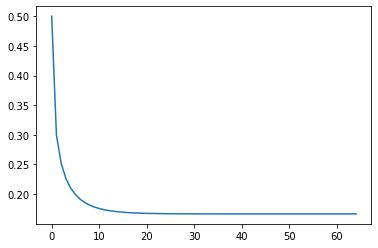

In [126]:
f = lambda x,r:r*x*(1-x)
def plotTimeCourse(f,r,xInit):
    convergentValues = np.zeros(np.arange(1001).size)
    #for k in range(0,1001):
    iterations = np.arange(9999)+1

    converged = False

    x_n = np.zeros(np.arange(10001).size)
    x_0 = xInit
    x_n[0]=x_0
    #print("Initial Value: {}".format(x_0))

    for i in iterations:
        x_n[i] = f(x_n[i-1],r)
        if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
            print("x_n converged to {} after {} iterations".format(x_n[i],i))
            convergentValues[k] = x_n[i]
            convergentIndex = i
            converged = True
            break
        else:
            continue
    if(converged==False):
        print("An initial value of {} caused the system to freak out".format(x_0))
        convergentIndex = iterations[-1]
    #if(converged==True):
    fig = plt.plot((iterations -1)[0:convergentIndex], x_n[0:convergentIndex])
    print("Time-Course for an r-value of {} and an initial value of {}".format(r,x_0))
    plt.show(fig)
    #convergenceTimeSteps[k] = 0
plotTimeCourse(f,1.2,1/2)

So, something I've noticed from trying some stuff out is that initial values of greater than 1 seem to be problematic, at least for $r \in [1,3.9]$. That makes sense, as the magnitude of the value of $x$ would tend to grow greater under iteration for an arbitrary initial value of $x$ greater than 1, but for the special case of $x \in (1,2)$, $|1-x| < 1$, so I didn't know for sure.

I know this is not the subject of this investigation, but for $r \in (0,1)$, it seems that, for initial values greater than $\frac{1}{r}$, the system does not converge, but the system does seem to converge for initial values smaller than or equal to $\frac{1}{r}$. Anyway, back to $r \in [1,3.9]$.

I'll plot a few more time-courses, but then let's start plotting bifurcation diagrams. :-)

x_n converged to 0.33333334113969143 after 23 iterations
Time-Course for an r-value of 1.5 and an initial value of 0.5


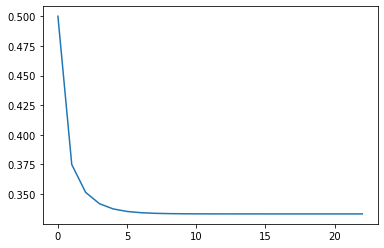

x_n converged to 0.5999999968181187 after 24 iterations
Time-Course for an r-value of 2.5 and an initial value of 0.5


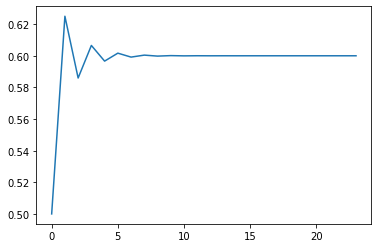

An initial value of 0.5 caused the system to freak out
Time-Course for an r-value of 3.5 and an initial value of 0.5


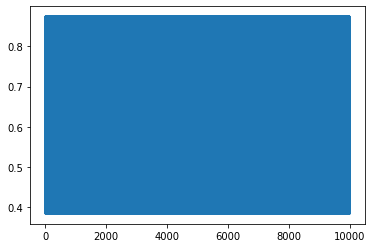

x_n converged to 0.1666666991837758 after 61 iterations
Time-Course for an r-value of 1.2 and an initial value of 0.2


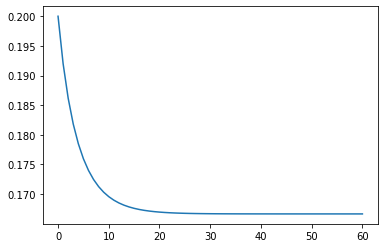

In [127]:
plotTimeCourse(f,1.5,0.5)
plotTimeCourse(f,2.5,0.5)
plotTimeCourse(f,3.5,0.5)
plotTimeCourse(f,1.2,0.2)

It doesn't appear that initial condition, as long as it does not stray out of $(0,1)$, has too much of a qualitative effect on the system, since the stable fixed point depends entirely on the value of $r$. Something's definitely up with $r = 3.5$. Let's check out bifurcation diagrams.

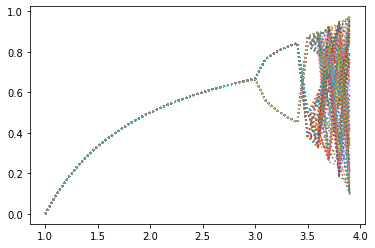

In [146]:
f = lambda x,r:r*x*(1-x)

def bifurcationAnalysis(f,rVals,xInit,returnData=False,plot=True):
    numRIters = rVals.size
    
    convergentValues = np.zeros((numRIters,100))
    for k in range(0,numRIters):

        r = rVals[k]

        iterations = np.arange(9999)+1

        converged = False

        x_n = np.zeros(np.arange(10001).size)
        x_0 = xInit
        x_n[0]=x_0
        #print("Initial Value: {}".format(x_0))

        for i in iterations:
            x_n[i] = f(x_n[i-1],r)
            if (np.abs(x_n[i]-x_n[i-1]) < 10**(-8)):
                #print("x_n converged to {} after {} iterations".format(x_n[i],i))
                convergentValues[k,:] = x_n[i]*np.ones(np.arange(100).size)
                convergentIndex = i
                converged = True
                break
            else:
                continue
        if(converged==False):
            #print("An initial value of {} caused the system to freak out".format(x_0))
            convergentValues[k,:] = x_n[-101:-1]
        '''if(converged==True):
            plt.plot((iterations -1)[0:convergentIndex], x_n[0:convergentIndex])
        plt.show()'''
        #convergenceTimeSteps[k] = 0
    #print(convergentValues)
    if(plot==True):
        fig = plt.plot(rVals,convergentValues,linestyle="dotted")
        plt.show(fig)
    if(returnData == True):
        return convergentValues
logisticRValues = 1 + 0.1*np.arange(30)
bifurcationAnalysis(f,logisticRValues,0.09)

Well, that's pretty freakin' cool. To test whether or not this actually depends on initial conditions, let's run it with initial conditions from $0.09$ to $0.9$.

Bifurcation for an initial value of 0.09


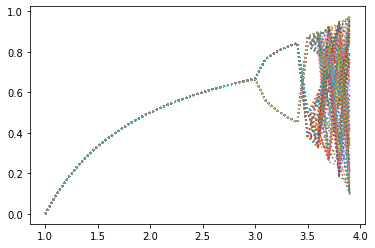

Bifurcation for an initial value of 0.18


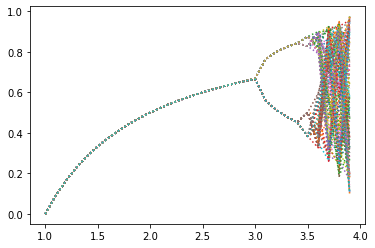

Bifurcation for an initial value of 0.27


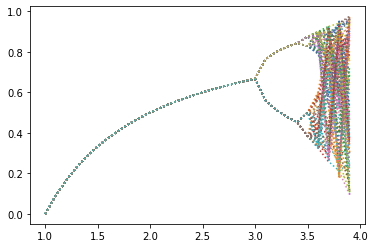

Bifurcation for an initial value of 0.36


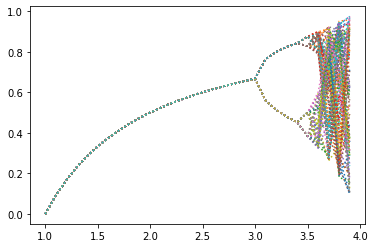

Bifurcation for an initial value of 0.44999999999999996


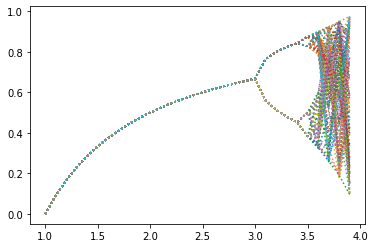

Bifurcation for an initial value of 0.54


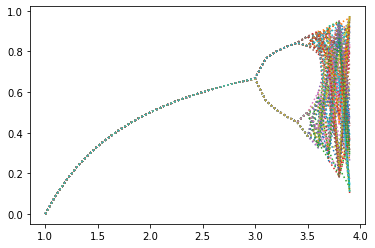

Bifurcation for an initial value of 0.63


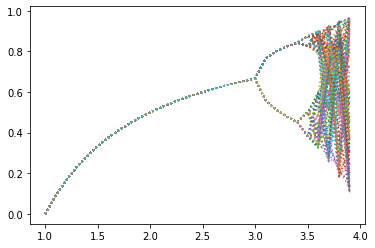

Bifurcation for an initial value of 0.72


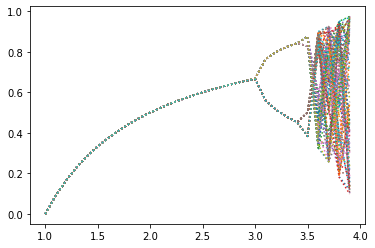

Bifurcation for an initial value of 0.8099999999999999


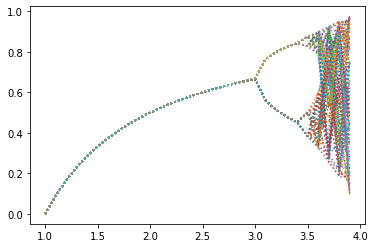

Bifurcation for an initial value of 0.8999999999999999


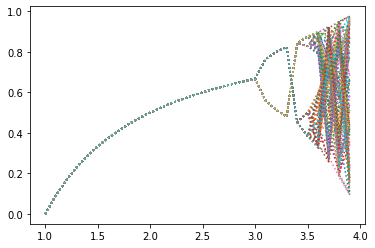

In [147]:
for i in range(0,10):
    x_0 = 0.09*(i+1)
    print("Bifurcation for an initial value of {}".format(x_0))
    bifurcationAnalysis(f,logisticRValues,x_0)

So, it is very appropriate to ask: what the heck is going on in this system? Well, I guess to answer that question, it will be helpful to rephrase it: for each $r \in [1,3.9]$, can we understand why the qualitative behavior (i.e convergence or lack thereof) is what it is?

Well, for $r \in (1,3)$, we can note that $|2-r| < 1$, so we would expect the fixed point at $\frac{r-1}{r} = 1 - \frac{1}{r}$ to be stable. Therefore, that the system converges to this value for each $r \in (1,3)$ does not come as a surprise, nor does the fact that this value seems to be increasing with $r$. However, once we consider $r=3$, our stability analysis tools tell us nothing about the system's convergence. So, can we understand what's occurring?

Great question. I'm really not sure how to describe what's going on after $r=3$ except that the system becomes cyclical in nature for a while; at first, it bounces back and forth between two points instead of converging; then, eventually, it starts bouncing back and forth between 4, and after that, it starts bouncing back and forth between many points or just isn't cyclical. Let's revisualize this notion in terms of how many unique terms there are in the last 100 iterations of the system versus the value of $r$.

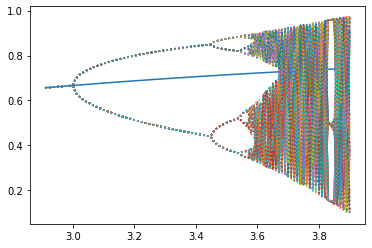

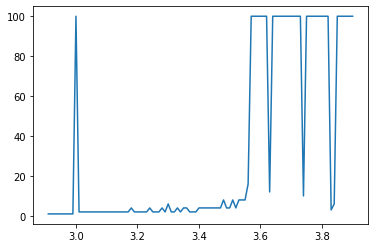

In [148]:
zoomedInRVals = 2.9 + 0.01*(np.arange(100)+1)
convergenceData = bifurcationAnalysis(f,zoomedInRVals,1/2,returnData=True,plot=False)

approach1 = lambda r: (r-1)/r
vApproach1 = np.vectorize(approach1)
approachPlot = plt.plot(zoomedInRVals,vApproach1(zoomedInRVals))

bifurcationPlot = plt.plot(zoomedInRVals,convergenceData,linestyle="dotted")
plt.show(bifurcationPlot,approachPlot)

numUniques = np.zeros(convergenceData[:,0].size)
for k in range(convergenceData[:,0].size):
    numUniques[k] = np.unique(convergenceData[k,:]).size
uniquePlot = plt.plot(zoomedInRVals, numUniques)

plt.show(uniquePlot)

As much as I'd like to say this illuminated the behavior of the whole system for me, I still find it qute mysterious: we can see in the above plot that it seems like, at $r = 3$, the system is totally chaotic; that is, it never diverges, but it never repeats a value either. Afterwards, as reflected in the bifurcation diagram, the system bounces back and forth between 2 values for a while.

However, there is a value of $r$ -- it looks to be 3.58 or so -- where the system becomes chaotic again and stays that way for a while. But there seems to be a small interval where cycles emerge again; an interesting thing to see is that it seems like the number of elements in the cycle has increased from the earlier vaues of $r$. Eventually, in this last interval of order, one can see that it seems like there is a relatively large window where stable cycles exist, around $r = 3.82$ or so. That actually seems to correspond to a visible band in the bifurcation diagram where only a few values are being hit.

One thing that's curious is that, in the bifurcation diagram, there seems to be quite a wide range of values that are not hit by the system when $r < ~3.67$ or so. However, the system progressively fills in more and more of the interval between its two outermost outputs. It kind of looks like the graph of $\frac{r-1}{r}$, the trajectory that we might have expected the values of the system to continue on, passes through this gap, so I'll graph this trajectory above to take a look.

Upon examining the above bifurcation plot, we can see that the graph of $\frac{r-1}{r}$, the blue curve on the bifurcation plot, indeed spears this gap in the values. Curious.

I wasn't really sure this analysis would be cool, but seeing these two ways of representing the data side-by-side makes it easier to see how the behavior of the system changes from orderly to chaotic and back again and how long it spends in each type of behavior.

Anyway: I'm not really sure if that thoroughly answers the question "How does the system behave?" But I think I learned something about this system, and now I have some code to apply to other dynamical systems.

Question 5: A system I'm interested in modeling

I think one system that I'm particularly interested is how endothermic organisms regulate their internal body temperature.

There seems to be a nominal temperature for the body to have (or one that's particular to each person); why is this the case? Well, one reason why it is helpful for it to be so is that the enzymes encoded by the human genome and produced in most human cells are denatured or are not as active if not kept around this nominal temperature. Deviating from it can have other effects.

Therefore, the body has mechanisms (like vasodilation/vasoconstriction, sweating, getting goosebumps, sticking out one's tongue, etc.) by which it can try to cool itself off or trap enough heat to raise its temperature.

There's definitely a lot involved in this phenomenon, so creating a super-accurate model for it seems perhaps a bit difficult. However, there is one particular aspect of it that I'm interested in investigating. When I was taking Physics 360, a plot of the specific heat of water versus temperature was shown: it has a quadratic-ish nature, and the minimum seemed to be right around 37.6 degrees Celsius, which is a normal body temperature. It seemed too great of a coincidence, hence my curiosity.

Thus, my specific question is this: how does the specific heat of water and how it changes with temperature affect the ability of endothermic organisms to regulate their internal temperature? Would the internal temperature of endothermic organisms (which is very similar across seemingly all endotherms) be different if the specific heat of water had a different relation to temperature?

The features of the system that a model would want to account include but are not limited to the following: a fixed point at some set temperature $T_{nominal}$, a failure to converge outside of a given initial temperature interval (representing how an organism can't survive at certain temperatures), and some dependence on a specific heat parameter, which would be some function of temperature. Additional features that might be covered through the model could come up as one tried to fit the model to data from actual organisms.

The state variable in this system would be internal body temperature: everything else seems to depend on it in some form or another. Then, there may be a few parameters, one being the function outputting the specific heat of water for a given input temperature.

Question 6: Cellular Automata Time

Building off of the code provided in Coding Resources, we can create a cellular automata and attempt to find update rules that produce a stable spatial pattern: that is, one that does not vary over time.

[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


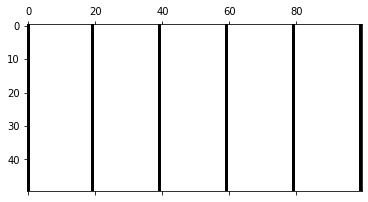

In [183]:
numCells = 100
nSteps = 50

cellStates = np.zeros((nSteps,numCells))

identityUpdateRule = {'000':0,
              '001':0,
              '010':1,
              '011':1,
              '100':0,
              '101':0,
              '110':1,
              '111':1}

def updatePeriodicBoundary(t,cellList,updateRule):
    for k,cell in enumerate(cellList[t,:]):
        leftNeighbor = int(cellList[t,(k-1)%numCells])
        cellInQuestion = int(cellList[t,k%numCells])
        rightNeighbor= int(cellList[t,(k+1)%numCells])
        stateNeighborhood = '{}{}{}'.format(leftNeighbor, cellInQuestion,rightNeighbor)
        newValue = updateRule[stateNeighborhood]
        cellList[t+1,k] = newValue

def initializeAutomata(automataStates,initialCondition):
    for k in initialCondition:
        automataStates[0,k] = 1
    
def visualizeAutomata(automataStates):
    plt.spy(automataStates)

initializeAutomata(cellStates,[0,19,39,59,79,99])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,identityUpdateRule)
visualizeAutomata(cellStates)
    

One update rule that will lead to stable pattern formation is the identity update rule, where all 3-tuples map to their center value: i.e 101 will map to 0 because 0 is the center value -- the cell being mapped. As seen above, this does result in a stable pattern. I'll try to find another update rule that has a similar result but is a little more complicated.

More specifically, I'll try to find a rule that will establish a stable pattern on any given input of cell states.

In [215]:
numCells = 100
nSteps = 100

tryptychFlipUpdateRule = {'000':1,
              '001':0,
              '010':1,
              '011':1,
              '100':0,
              '101':0,
              '110':1,
              '111':0}


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


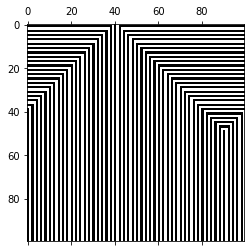

In [193]:
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,tryptychFlipUpdateRule)
visualizeAutomata(cellStates)

Woah.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


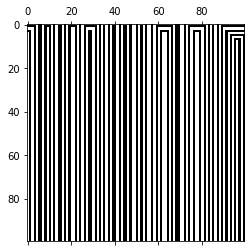

In [196]:
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[rand.randrange(100) for i in range(20)])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,tryptychFlipUpdateRule)
visualizeAutomata(cellStates)

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


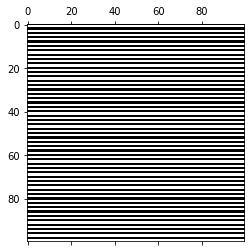

In [198]:
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,np.arange(100))
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,tryptychFlipUpdateRule)
visualizeAutomata(cellStates)

Eventually, as posited, the system does indeed reach a steady state, even for a random set of initial conditions. However, it does not establish a stable pattern for inputs where all cells are alive or all cells are dead.

This system can really graphically appealing in certain instances. I guess, what I was looking for in the update rule was that distinct columns had to be established: i.e the rules had to include $010 \to 1$ and $101 \to 0$. That way, if a distinct column (i.e a living cell with two dead neighbors or vice-versa) was established, it would stay that way. Then, it was a guess that one would want to try and turn other cells into these kinds of situations, so I implemented $000 \to 1$ and $111 \to 0$. Keeping the others as identity elements was just a guess. Let me see what happens when I change one of these other rules, e.g $110 \to 1$, to something else.

In [202]:
numCells = 100
nSteps = 200

tryptychModFlipUpdateRule = {'000':1,
              '001':0,
              '010':1,
              '011':1,
              '100':0,
              '101':0,
              '110':0,
              '111':0}


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


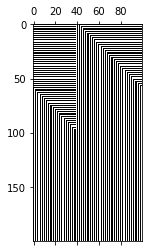

In [203]:
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,tryptychModFlipUpdateRule)
visualizeAutomata(cellStates)

That's definitely different, but it seems to reach a steady state with this initial condition if given long enough.

Finally, there are the uniform update rules, where all are mapped to 0 or all are mapped to 1. Those give stable pattern formation of all dead or all alive, respectively.

In [204]:
numCells = 100
nSteps = 25

uniformUpdateRule = {'000':1,
              '001':1,
              '010':1,
              '011':1,
              '100':1,
              '101':1,
              '110':1,
              '111':1}

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


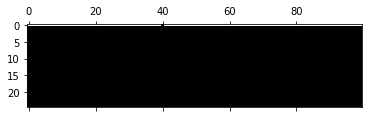

In [205]:
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,uniformUpdateRule)
visualizeAutomata(cellStates)

Now, I'll investigate what happens with pinned boundary conditions: first, let's try both ends being pinned at 0.

In [333]:
def updatePinnedBoundary(t,cellList,updateRule, pins=[0,0]):
    for k,cell in enumerate(cellList[t,:]):
        if(k == 0):
            leftNeighbor = pins[0]
        else:
            leftNeighbor = int(cellList[t,(k-1)%numCells])
        cellInQuestion = int(cellList[t,k%numCells])
        if(k==(cellList[t,:].size-1)):
            rightNeighbor = pins[1]
        else:
            rightNeighbor = int(cellList[t,(k+1)%numCells])
        
        stateNeighborhood = '{}{}{}'.format(leftNeighbor, cellInQuestion,rightNeighbor)
        newValue = updateRule[stateNeighborhood]
        cellList[t+1,k] = newValue

[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


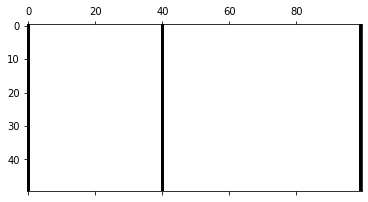

In [334]:
numCells = 100
nSteps = 50

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0,40,99])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,identityUpdateRule)
visualizeAutomata(cellStates)

Unsurprisingly, the identity update rule is not affected. Let's try the Tryptych Flip rule and see how that might be changed.

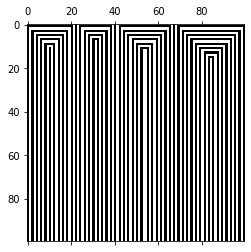

In [341]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[22,40,67])
#print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,tryptychFlipUpdateRule)
visualizeAutomata(cellStates)

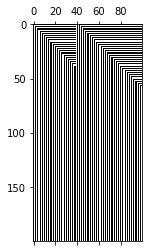

In [342]:
numCells = 100
nSteps = 200

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])
#print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,tryptychModFlipUpdateRule)
visualizeAutomata(cellStates)

It looks as if the Tryptych Flip Rule still gives a stable pattern; it's very interesting and it settles down much quicker. The Tryptych Mod Flip Rule has a different pattern, and it still settles down to a stable state. Let's set the pinned boundaries to be $0$ and $1$ instead.

[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


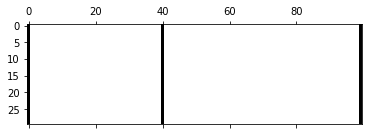

In [343]:
numCells = 100
nSteps = 30

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0,40,99])
print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,identityUpdateRule,pins=[0,1])
visualizeAutomata(cellStates)

Identity is unfazed.

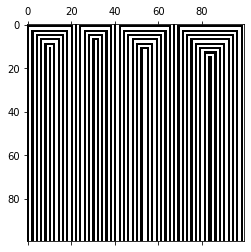

In [346]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[22,40,67])
#print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,tryptychFlipUpdateRule,pins=[0,1])
visualizeAutomata(cellStates)

It looks like the Tryptych Flip isn't really affected at all by changing the value of the right-hand pinned boundary.

What about the Tryptych Modified Update Rule?

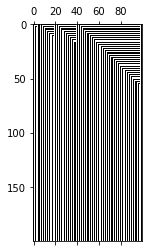

In [347]:
numCells = 100
nSteps = 200

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[5,20,40,99])
#print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,tryptychModFlipUpdateRule,pins=[0,1])
visualizeAutomata(cellStates)

The pattern changed a bit; it still found a steady state, but it looks quite cool. I'm going to try using pinned boundaries of $1$ on both sides with this update rule to see what would happen.

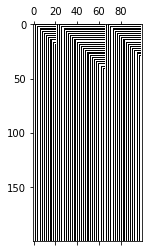

In [350]:
numCells = 100
nSteps = 200

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0,22,67])
#print(cellStates)
for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,tryptychModFlipUpdateRule,pins=[1,1])
visualizeAutomata(cellStates)

Nothing really changed fundamentally with regard to this pattern.

Note: Pinned Boundary Condition was buggy for a while. When you always set the right neighbor to be 0, one cool thing to see is that, for every cell that was originally alive in the automata, with the Tryptych Mod update rule and these conditions, you get a kind of bubbly line going diagonally across the pattern, originating at the original alive cell.

Now to investigate reflecting boundary conditions.

In [351]:
def updateReflectingBoundary(t,cellList,updateRule):
    for k,cell in enumerate(cellList[t,:]):
        if(k == 0):
            leftNeighbor = int(cellList[t,k])
        else:
            leftNeighbor = int(cellList[t,(k-1)%numCells])
        cellInQuestion = int(cellList[t,k%numCells])
        if(k==(cellList[t,:].size-1)):
            rightNeighbor = int(cellList[t,k])
        else:
            rightNeighbor = int(cellList[t,(k+1)%numCells])
            
        stateNeighborhood = '{}{}{}'.format(leftNeighbor, cellInQuestion,rightNeighbor)
        newValue = updateRule[stateNeighborhood]
        cellList[t+1,k] = newValue

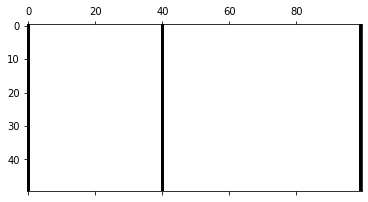

In [352]:
numCells = 100
nSteps = 50

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0,40,99])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,identityUpdateRule)
visualizeAutomata(cellStates)

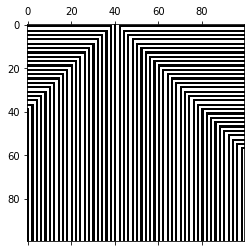

In [356]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,tryptychFlipUpdateRule)
visualizeAutomata(cellStates)

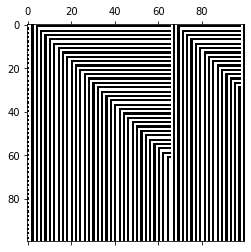

In [355]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0,2,67,99])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,tryptychModFlipUpdateRule)
visualizeAutomata(cellStates)

These are cool: especially the Tryptych Rule plot has some neat symmetry because of the reflected boundary conditions.

Question 7: Waves of Blobs

Now to find update rules that will induce waves and test their perfomance on the three boundary conditions provided.

Let's first try a slight modification of the identity rule.

In [272]:
WaveRule1 = {'000':0,
              '001':0,
              '010':0,
              '011':1,
              '100':0,
              '101':1,
              '110':1,
              '111':1}

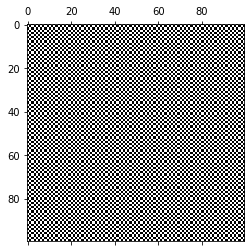

In [279]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50))

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveRule1)
visualizeAutomata(cellStates)

I realized that my wave rule wasn't going to work unless the initial condition was comprised of every other cell being alive, so I input that and it looks pretty, but I'll try for something else.

One rule that should work in principle is the reflection of the rules that were given in the posing of the question on the homework document.

In [285]:
WaveRuleMirror = {'000':0,
              '001':1,
              '010':0,
              '011':1,
              '100':0,
              '101':0,
              '110':1,
              '111':1}

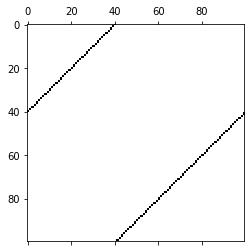

In [286]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveRuleMirror)
visualizeAutomata(cellStates)

This is just the reverse of the behavior that occurs when one institutes the rules suggested in the homework.

Here's one that might be curious.

In [287]:
WaveRuleGun = {'000':0,
              '001':1,
              '010':1,
              '011':0,
              '100':0,
              '101':0,
              '110':1,
              '111':1}

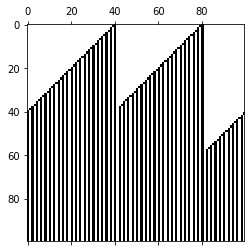

In [293]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,80])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveRuleGun)
visualizeAutomata(cellStates)

As the name for this rule above might suggest, I thought, erroneously, that this rule would create a glider gun, like one from Conway's Game of Life. Instead, it seems to have created a gliding column generator.

In [302]:
WaveTravelBuddy = {'000':0,
              '001':1,
              '010':0,
              '011':0,
              '100':0,
              '101':0,
              '110':1,
              '111':1}

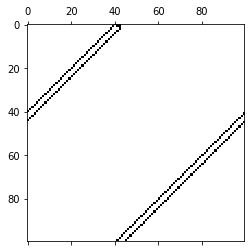

In [305]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41,42])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveTravelBuddy)
visualizeAutomata(cellStates)

Now this is kind of more interesting. For an initial condition of three alive cells right next to each other, the waves are co-occurring and travel together.

For a different set of initial conditions, something else occurs. Remove one of the alive cells and you get a one-shot glider gun.

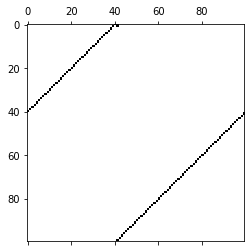

In [306]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveTravelBuddy)
visualizeAutomata(cellStates)

In [307]:
WaveGlassCannon = {'000':0,
              '001':1,
              '010':0,
              '011':0,
              '100':1,
              '101':0,
              '110':0,
              '111':1}

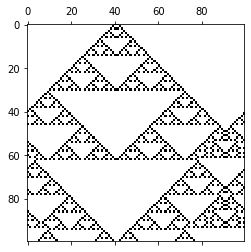

In [308]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveGlassCannon)
visualizeAutomata(cellStates)

So, this was actually an accident. I didn't mean to run this one with this initial condition, but it was a happy mistake. That's really cool, although in truth, I'm not entirely sure why it's forming, although the extra fractaly triangles that form when the triangle that's wrapped all the way around intersects the one that's already there is nice-looking. For a different initial condition:

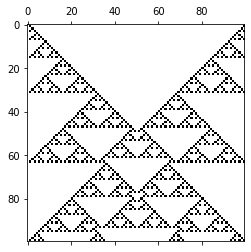

In [316]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[0])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePeriodicBoundary(n,cellStates,WaveGlassCannon)
visualizeAutomata(cellStates)

That was not at all what I was expecting. I should move on to how these are affected by boundary conditions now.

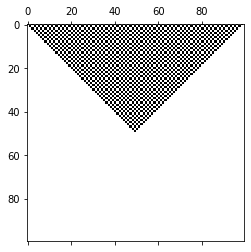

In [358]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50))

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRule1)
visualizeAutomata(cellStates)

When the boundaries are both pinned at 0, it's like the edges have been poisoned: the ability of the boundary cells to shift is compromised first and then because they are no longer present, the same happens to the next pair of cells, and so on and so forth.

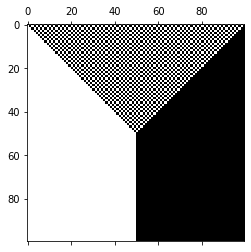

In [360]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50))

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRule1,pins=[0,1])
visualizeAutomata(cellStates)

Now this is just cool! Under the rules used for this, both $011$ and $111$ map to $1$, so the initial condition and boundary give the cells on the right side just the right material to start filling out the automata as the wave pattern slowly collapses. Then, it stops right at the middle because $001$ still maps to $0$. I predict that the other half will also be colored in when both boundaries are pinned at $1$.

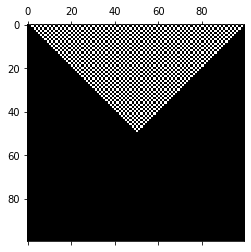

In [361]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50))

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRule1,pins=[1,1])
visualizeAutomata(cellStates)

Cool! Now for the other patterns.

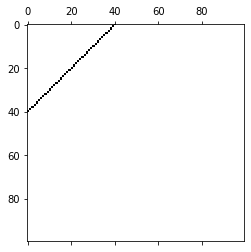

In [363]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRuleMirror)
visualizeAutomata(cellStates)

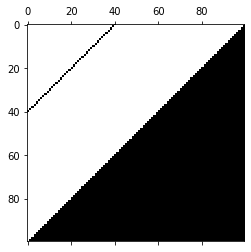

In [368]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRuleMirror,pins=[0,1])
visualizeAutomata(cellStates)

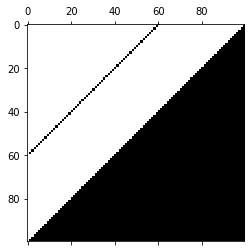

In [371]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[60])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveRuleMirror,pins=[1,1])
visualizeAutomata(cellStates)

It makes sense that the glider fizzles out once it reaches the boundary; then, the spreading cells from the right boundary are because $001$ maps to $1$ in this rule set so you start getting automatic growth from that side.

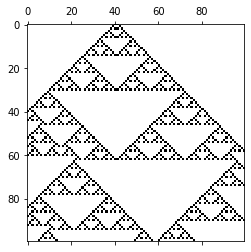

In [377]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveGlassCannon)
visualizeAutomata(cellStates)

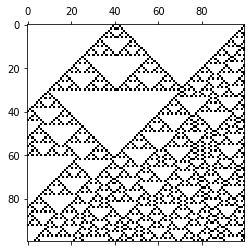

In [378]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveGlassCannon,pins=[0,1])
visualizeAutomata(cellStates)

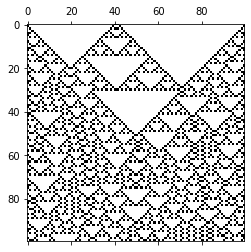

In [379]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveGlassCannon,pins=[1,1])
visualizeAutomata(cellStates)

In this rule set, the pinned boundaries of $0$ did little to impede the automata's growth, but the pinned boundaries of $1$ acted like seeds from which live cells could start to reproduce.

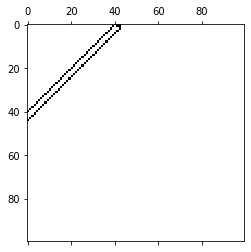

In [383]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41,42])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveTravelBuddy)
visualizeAutomata(cellStates)

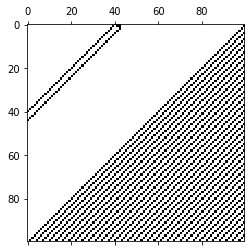

In [384]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41,42])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveTravelBuddy,pins=[0,1])
visualizeAutomata(cellStates)

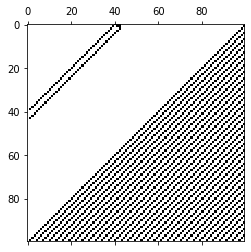

In [385]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41,42])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updatePinnedBoundary(n,cellStates,WaveTravelBuddy,pins=[1,1])
visualizeAutomata(cellStates)

This system ended up being very similar to the Wave Mirror system since, under this set of rules, $001$ maps to $1$ but $100$ does not map to $1$. Therefore, the right boundary was able to act like a seed, but the left boundary was unable to do the same.

Now, let's investigate these rules under the reflecting boundary conditions.

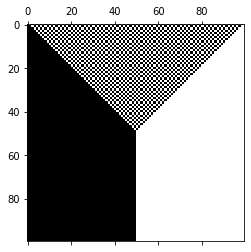

In [386]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50))

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,WaveRule1)
visualizeAutomata(cellStates)

So we see that we get the full half of the automata being filled where the initial condition touches the boundary: if I added one to all the indices of the initial condition to move them all over one, I bet the half that is filled in will switch as well.

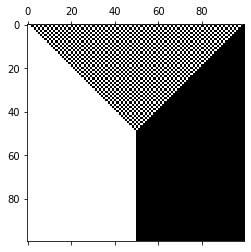

In [387]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,2*np.arange(50)+1)

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,WaveRule1)
visualizeAutomata(cellStates)

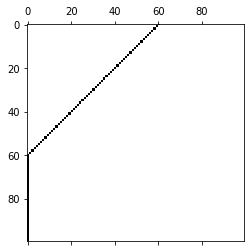

In [388]:
numCells = 100
nSteps = 100
cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[60])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,WaveRuleMirror)
visualizeAutomata(cellStates)

Because $110$ maps to $1$ in this rule set, the glider's trajectory continued to slide down the wall instead of just fizzling out.

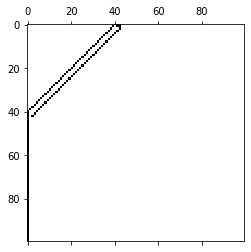

In [389]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41,42])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,WaveTravelBuddy)
visualizeAutomata(cellStates)

Kind of a similar deal to the one before, except that $010$ maps to $0$ so one glider trail is extinguished.

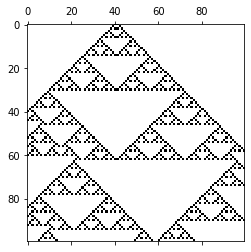

In [393]:
numCells = 100
nSteps = 100

cellStates = np.zeros((nSteps,numCells))
initializeAutomata(cellStates,[40,41])

for n in np.arange(nSteps):
    if n != nSteps - 1:
        updateReflectingBoundary(n,cellStates,WaveGlassCannon)
visualizeAutomata(cellStates)

Not a whole lot seems to happen with this one. It seems pretty robust under changes in boundary condition. If anything, it seems like there is some weird stuff going on with the dimensions of some of the empty triangles near the boundaries.

Question 8: The Proverbial Pendulum

A couple phase space diagrams for a pendulum coming on up.

